In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [2]:
df0 = pd.read_csv("auto_scout_part2.csv")
df = df0.copy()

In [3]:
df.head()

,make_model,make,model,price,body_type,type,doors,origin_country,warranty,mileage,first_registration,gearbox,fuel_type,color,paint,seller,seats,engine_size,gears,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_color,upholstery,previous_owner,horse_power,fuel_consumption,comfort_convenience,safety_security,entertainment,extras,current_location
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,16950.0,Compact,Used,5.0,Spain,No,120200.0,2016.0,Automatic,Diesel,Black,Metallic,Dealer,5.0,1.4,6.0,Front,4.0,1270.625000,No,Under Class,Black,Part Leather,1.0,122.0,3.800000,Deluxe,Premium,Standard,Standard,ES
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,80900.0,Compact,Pre-registered,4.0,Spain,No,5000.0,2022.0,Automatic,Electric,Grey,Uni/basic,Dealer,5.0,0.0,9.0,Front,1.0,1676.379136,No,Under Class,Black,Part Leather,1.0,109.0,4.142905,Deluxe,Premium,Premium,Standard,ES
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,69900.0,Compact,Used,5.0,Spain,No,18900.0,2020.0,Automatic,Benzine,Grey,Uni/basic,Dealer,5.0,1.9,8.0,4WD,4.0,1528.611111,No,Under Class,Black,Part Leather,1.0,230.0,8.400000,Deluxe,Premium,Premium,Standard,ES
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,46990.0,Compact,Used,5.0,Spain,No,18995.0,2020.0,Automatic,Benzine,Yellow,Uni/basic,Dealer,5.0,1.9,7.0,4WD,4.0,1460.000000,No,Under Class,Black,Part Leather,1.0,230.0,7.300000,Standard,Standard,Standard,Standard,ES
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,16800.0,Compact,Used,5.0,Spain,No,197000.0,2015.0,Automatic,Diesel,White,Metallic,Dealer,5.0,2.1,7.0,4WD,4.0,1545.000000,No,Under Class,Black,Part Leather,2.0,230.0,4.900000,Standard,Standard,Standard,Standard,ES


In [4]:
df.shape

(28630, 34)

In [5]:
df.isnull().sum()

make_model              0
make                    0
model                   0
price                   0
body_type               0
type                    0
doors                   0
origin_country          0
warranty                0
mileage                 0
first_registration      0
gearbox                 0
fuel_type               0
color                   0
paint                   0
seller                  0
seats                   0
engine_size             0
gears                   0
drivetrain              0
cylinders               0
empty_weight            0
full_service_history    0
emission_class          0
upholstery_color        0
upholstery              0
previous_owner          0
horse_power             0
fuel_consumption        0
comfort_convenience     0
safety_security         0
entertainment           0
extras                  0
current_location        0
dtype: int64

In [6]:
df.index

RangeIndex(start=0, stop=28630, step=1)

In [7]:
# Handle outliers in 'price' column

In [8]:
df.price.describe()

count    2.863000e+04
mean     2.355520e+04
std      2.595371e+04
min      4.900000e+02
25%      1.199000e+04
50%      1.798000e+04
75%      2.799000e+04
max      1.346900e+06
Name: price, dtype: float64

In [9]:
def distribution_plot(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=df, x=col, ax=ax[0], bins=100)
    sns.boxplot(data=df, x=col, ax=ax[1])
    plt.show()

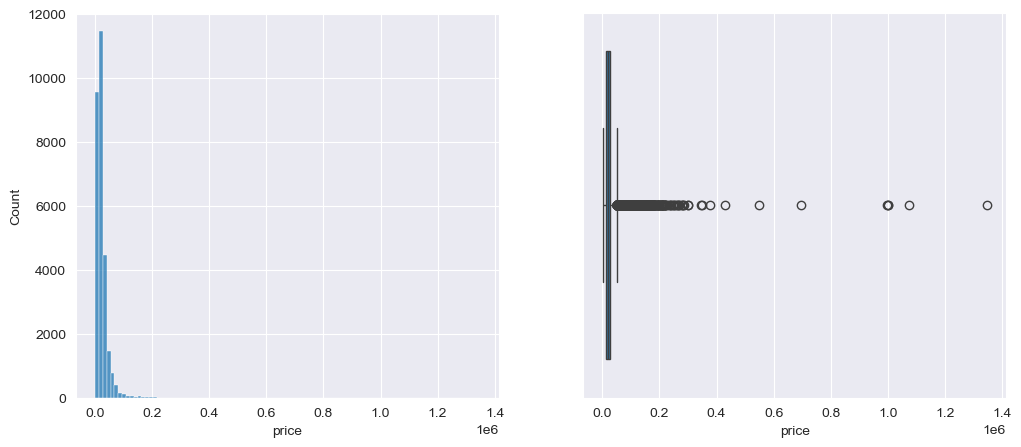

In [10]:
distribution_plot('price')

In [11]:
df.loc[:, ['make_model', 'price']].sort_values(by='price', ascending=False).head(20)

,make_model,price
21793,Ford GT,1346900.0
21778,Ford GT,1075900.0
28184,Volvo 240,999999.0
27804,Volvo 240,999999.0
21919,Ford GT,998000.0
1212,Mercedes-Benz G 63 AMG,696900.0
21553,Ford GT,549000.0
21606,Ford GT,430000.0
1317,Mercedes-Benz G 63 AMG,375900.0
21927,Ford,349000.0


In [12]:
df.drop([28184, 27804], axis=0, inplace=True)

In [13]:
df.drop(1212, axis=0, inplace=True)

In [14]:
df.loc[21927, 'make_model'] = 'Ford GT'

In [15]:
df.loc[:, ['make_model', 'price']].sort_values(by='price', ascending=True).head(20)

,make_model,price
5847,Renault Megane,490.0
5513,Renault Megane,500.0
19565,Nissan 100 NX,500.0
17516,Toyota Paseo,590.0
5291,Renault Megane,600.0
5351,Renault Megane,600.0
5296,Renault Megane,699.0
3375,Opel Astra,700.0
23792,Hyundai ACCENT,700.0
5519,Renault Megane,740.0


In [16]:
df.groupby('make')['price'].agg(['min', 'max', 'mean'])

,min,max,mean
make,,,
Dacia,1490.0,29950.0,13874.427456
Fiat,800.0,214900.0,15896.917451
Ford,1000.0,1346900.0,32255.372633
Hyundai,700.0,75991.0,19541.789502
Mercedes-Benz,1790.0,375900.0,52129.945766
Nissan,500.0,264900.0,21946.215116
Opel,700.0,74000.0,17063.384906
Peugeot,750.0,64290.0,16469.121186
Renault,490.0,178000.0,17411.987665


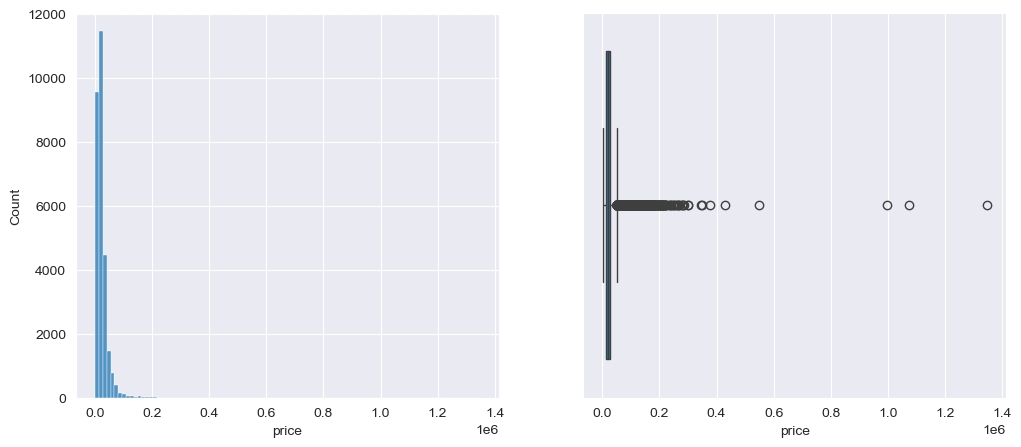

In [17]:
distribution_plot('price')

In [18]:
df[df.price > 600000].index

Index([21778, 21793, 21919], dtype='int64')

In [19]:
df.drop(df[df.price > 600000].index, axis=0, inplace=True)

In [20]:
## Handle outliers in 'doors' column

In [21]:
df.doors.describe()

count    28624.000000
mean         4.137717
std          1.215246
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: doors, dtype: float64

In [22]:
df.doors.value_counts()

doors
5.0    17637
2.0     5720
4.0     3001
3.0     2259
6.0        5
1.0        2
Name: count, dtype: int64

In [23]:
door_drop_index = df[(df.doors == 1) | (df.doors == 6)].index

In [24]:
df.drop(door_drop_index, axis=0, inplace=True)

In [25]:
df.doors.value_counts()

doors
5.0    17637
2.0     5720
4.0     3001
3.0     2259
Name: count, dtype: int64

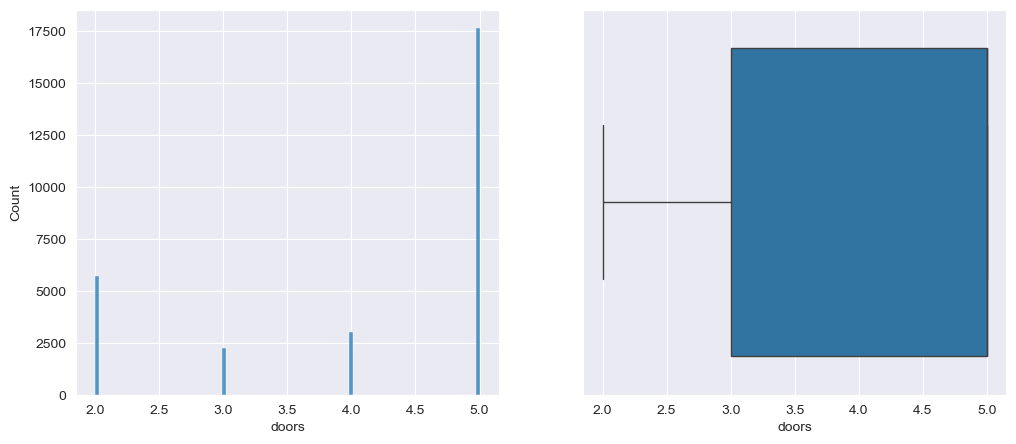

In [26]:
distribution_plot('doors')

In [27]:
## Handle outliers in 'mileage' column

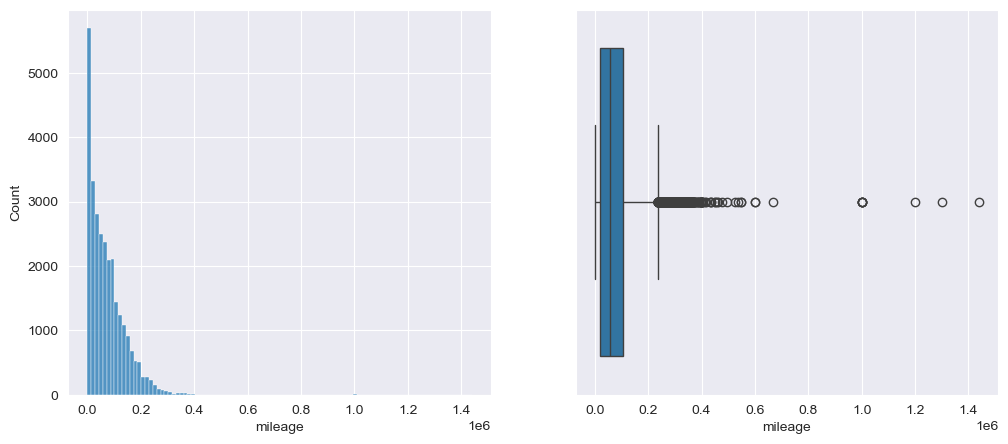

In [28]:
distribution_plot('mileage')

In [29]:
df.loc[:, ['mileage', 'first_registration', 'previous_owner']].sort_values(by='mileage', ascending=False).head(20)

,mileage,first_registration,previous_owner
18873,1440000.0,2019.0,1.0
17324,1300000.0,1986.0,2.0
12169,1199900.0,2018.0,1.0
22889,1000001.0,2018.0,1.0
7684,1000000.0,1968.0,2.0
10009,999999.0,1933.0,1.0
21344,999999.0,1966.0,2.0
3397,999999.0,1968.0,2.0
13153,667128.0,2010.0,2.0
28463,600001.0,2000.0,2.0


In [30]:
df.drop(df[df.mileage > 700000].index, axis=0, inplace=True)

In [31]:
## Handle outliers in 'first_registration' column

In [32]:
df.loc[:, ['make_model', 'first_registration', 'price']].sort_values(by='first_registration', ascending=False).head(20)

,make_model,first_registration,price
7011,Renault Clio,2202.0,16990.0
9764,Fiat 500 Abarth,2025.0,17995.0
19213,Nissan Micra,2023.0,3250.0
14634,Skoda Octavia,2022.0,34600.0
14635,Skoda Superb,2022.0,40490.0
9170,Peugeot 208,2022.0,22450.0
9167,Peugeot 308,2022.0,44495.0
17641,Toyota Hilux,2022.0,52140.0
9162,Peugeot 308,2022.0,30000.0
6099,Renault Captur,2022.0,33489.0


In [33]:
df.loc[7011, 'first_registration'] = 2022.0

In [34]:
df.drop([19213, 9764], axis=0, inplace=True)

In [35]:
df.loc[:, ['make_model', 'first_registration', 'price']].sort_values(by='first_registration', ascending=True).head(20)

,make_model,first_registration,price
22058,Ford Bronco,1900.0,57480.0
24783,Hyundai IONIQ,1900.0,26991.0
21372,Ford,1928.0,14490.0
21200,Ford M,1929.0,20000.0
8043,Peugeot,1930.0,8950.0
21317,Ford,1930.0,40000.0
21338,Ford,1932.0,40000.0
21461,Ford,1932.0,49900.0
21386,Ford,1932.0,54990.0
21454,Ford,1937.0,54000.0


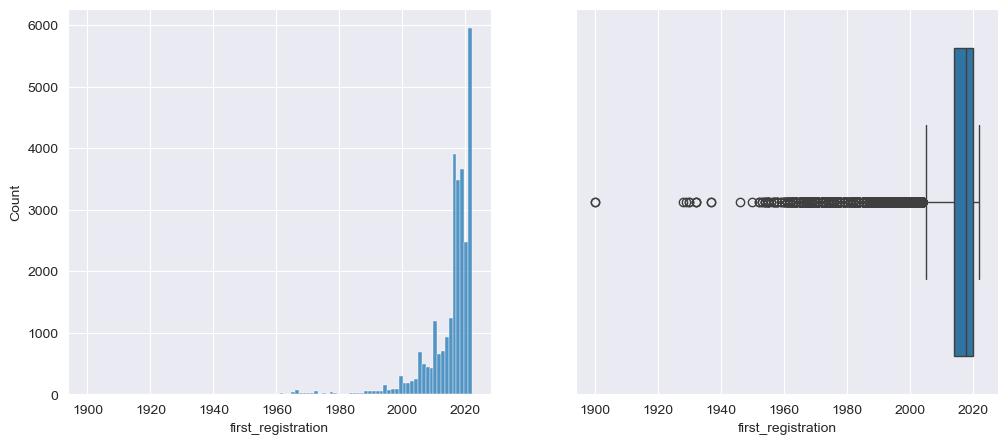

In [36]:
distribution_plot('first_registration')

In [37]:
df.first_registration.value_counts()

first_registration
2019.0    3666
2018.0    3488
2022.0    3085
2021.0    2871
2020.0    2473
2017.0    2425
2016.0    1486
2015.0    1237
2014.0     936
2013.0     703
2012.0     654
2011.0     642
2010.0     557
2007.0     492
2008.0     440
2009.0     424
2006.0     395
2005.0     287
2004.0     247
2003.0     211
2001.0     191
2002.0     187
2000.0     160
1999.0     144
1998.0      91
1997.0      81
1994.0      80
1995.0      78
1996.0      71
1992.0      60
1991.0      60
1993.0      55
1990.0      54
1966.0      40
1988.0      33
1967.0      33
1965.0      32
1973.0      29
1972.0      29
1987.0      26
1968.0      25
1978.0      23
1986.0      21
1989.0      20
1970.0      19
1985.0      18
1971.0      18
1979.0      17
1969.0      17
1983.0      16
1975.0      14
1977.0      13
1982.0      11
1964.0      11
1976.0      11
1984.0      10
1974.0       9
1981.0       9
1963.0       9
1962.0       8
1961.0       7
1980.0       6
1955.0       6
1958.0       4
1954.0       4
1960.0

In [38]:
fr_drop_index = df[df.first_registration < 1997].index

In [39]:
df.drop(fr_drop_index, axis=0, inplace=True)

In [40]:
df.shape

(27573, 34)

In [41]:
## Handle outliers in 'seats' column

In [42]:
df.seats.value_counts()

seats
5.0     20571
4.0      5341
2.0      1054
7.0       485
8.0        41
9.0        35
3.0        23
0.0         9
6.0         8
1.0         4
17.0        2
Name: count, dtype: int64

In [43]:
## Handle outliers in 'engine_size' column

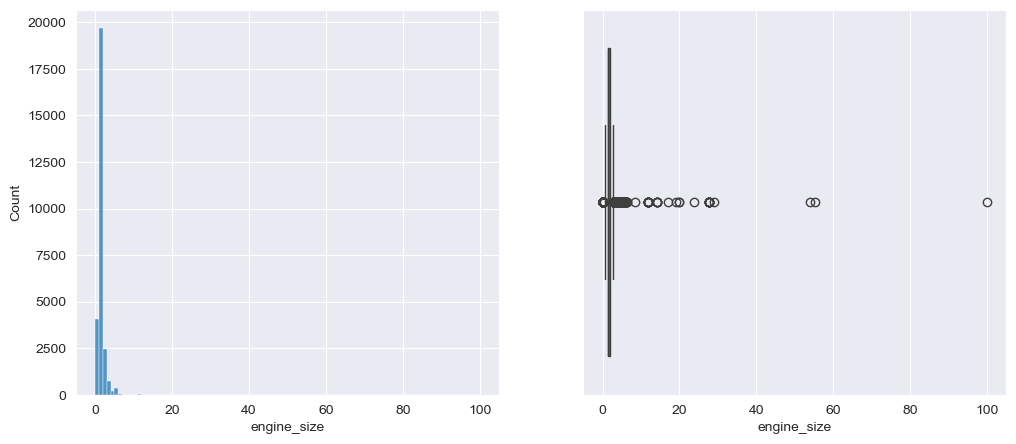

In [44]:
distribution_plot('engine_size')

In [45]:
df.engine_size.sort_values(ascending=False)

16556    99.9
24940    55.2
21330    54.0
19316    29.0
24600    27.6
         ... 
21937     0.0
4886      0.0
21948     0.0
21957     0.0
5051      0.0
Name: engine_size, Length: 27573, dtype: float64

In [46]:
df.loc[df[df.fuel_type == 'Electric'].index, 'engine_size'] = 0.0

In [47]:
df.engine_size.value_counts()

engine_size
1.90     6192
1.50     3646
1.40     3253
0.90     3116
1.30     2171
1.10     1596
1.20      990
1.70      919
2.40      661
2.90      597
1.60      544
0.80      537
0.00      507
2.10      362
5.00      256
2.00      220
3.90      216
2.20      207
1.00      197
3.40      186
3.60      156
2.50      136
3.70      134
4.90      125
1.80      121
2.30      119
2.70      104
5.40       66
4.60       54
3.10       22
4.00       19
2.60       16
5.20       16
6.20       14
2.80       11
3.00        9
3.50        8
27.60       7
5.90        6
3.80        5
5.50        5
1.95        4
5.10        4
1.45        3
4.40        3
5.80        3
5.60        3
4.50        3
14.04       3
11.90       3
6.30        2
4.70        2
4.10        1
0.60        1
29.00       1
2.01        1
54.00       1
0.30        1
16.90       1
5.15        1
8.50        1
3.30        1
3.20        1
5.70        1
19.10       1
99.90       1
Name: count, dtype: int64

In [48]:
es_drop_index = df[df.engine_size > 10].index

In [49]:
df.drop(es_drop_index, axis=0, inplace=True)

In [50]:
df[(df.engine_size > 0) & (df.engine_size < 0.7)].index

Index([9632, 15606], dtype='int64')

In [51]:
df.drop([9632, 15606], axis=0, inplace=True)

In [52]:
df.drop(5430, axis=0, inplace=True)

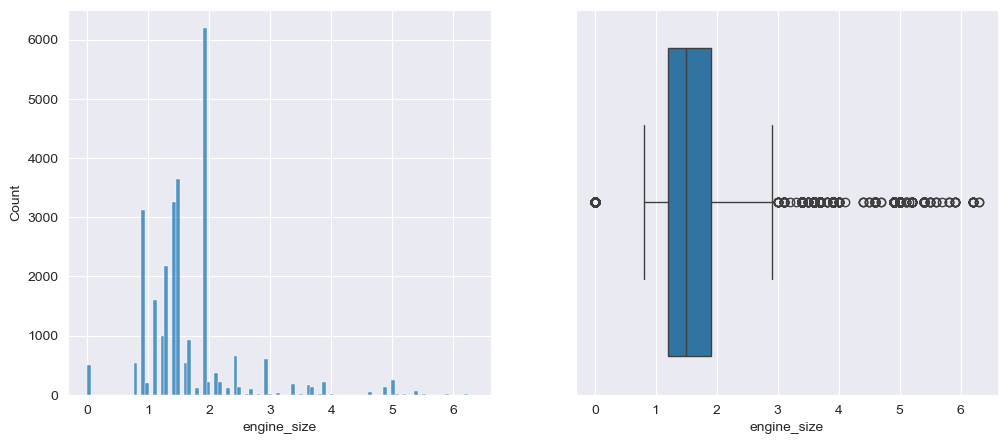

In [53]:
distribution_plot('engine_size')

In [54]:
## Handle outliers in 'gears' column

In [55]:
df.gears.value_counts()

gears
6.0     14887
5.0      6408
8.0      2831
7.0      1812
1.0       696
9.0       673
10.0      112
4.0        99
0.0        31
2.0         3
Name: count, dtype: int64

In [56]:
df.loc[df[df.fuel_type == 'Electric'].index, 'gears'] = 1.0

In [57]:
df.loc[df[df.gears == 9].index, 'gears'] = 8.0

In [58]:
df.loc[df[(df.gears == 0) | (df.gears > 8)].index, 'gears'] = np.nan

In [59]:
df.gears = df.gears.fillna(df.groupby(['make_model'])['gears'].transform(lambda x: x.median()))

In [60]:
df[df.gears == 2]

,make_model,make,model,price,body_type,type,doors,origin_country,warranty,mileage,first_registration,gearbox,fuel_type,color,paint,seller,seats,engine_size,gears,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_color,upholstery,previous_owner,horse_power,fuel_consumption,comfort_convenience,safety_security,entertainment,extras,current_location
9513,Fiat 500,Fiat,500,10950.0,Compact,Used,5.0,Spain,Yes,13500.0,2011.0,Manual,Benzine,White,Uni/basic,Dealer,4.0,0.9,2.0,Front,3.0,972.575163,Yes,Under Class,Black,Cloth,2.0,100.0,4.606612,Standard,Standard,Standard,Standard,DE
20646,Nissan Micra,Nissan,Micra,8990.0,Sedan,Used,5.0,Spain,No,114984.0,2015.0,Manual,Benzine,White,Uni/basic,Dealer,5.0,1.2,2.0,Front,4.0,1072.714286,No,Under Class,Black,Cloth,2.0,69.0,5.000000,Standard,Standard,Standard,Standard,ES
20683,Nissan Micra,Nissan,Micra,8990.0,Sedan,Used,5.0,Spain,No,114984.0,2015.0,Manual,Benzine,White,Uni/basic,Dealer,5.0,1.2,2.0,Front,4.0,1072.714286,No,Under Class,Black,Cloth,2.0,69.0,5.000000,Standard,Standard,Standard,Standard,ES


In [61]:
df.drop(df[df.gears == 2].index, axis=0, inplace=True)

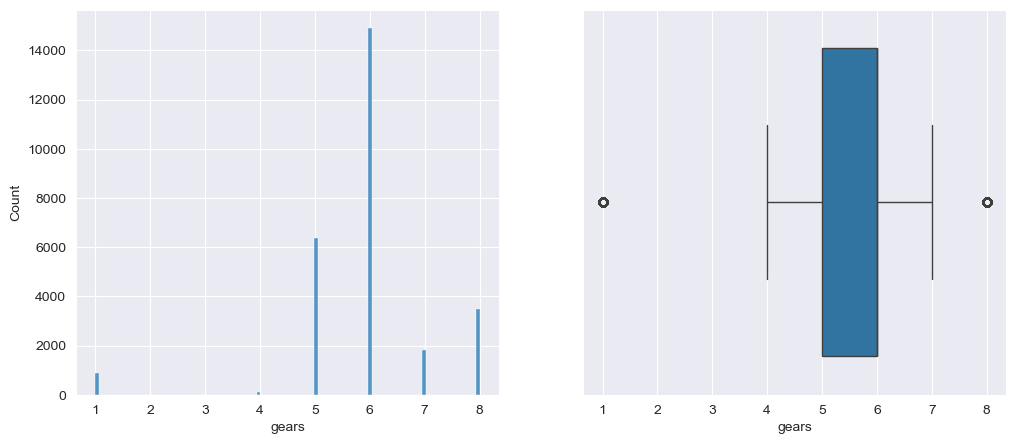

In [62]:
distribution_plot('gears')

In [63]:
## Handle outliers in 'cylinders' column

In [64]:
df.cylinders.value_counts()

cylinders
4.0     18962
3.0      5190
6.0      1200
5.0       988
8.0       758
2.0       174
1.0       149
0.0       104
7.0        12
12.0        9
11.0        1
26.0        1
16.0        1
Name: count, dtype: int64

In [65]:
df[df.cylinders.isin([11, 12, 16, 26])]

,make_model,make,model,price,body_type,type,doors,origin_country,warranty,mileage,first_registration,gearbox,fuel_type,color,paint,seller,seats,engine_size,gears,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_color,upholstery,previous_owner,horse_power,fuel_consumption,comfort_convenience,safety_security,entertainment,extras,current_location
456,Mercedes-Benz SL 55 AMG,Mercedes-Benz,SL 55 AMG,57700.0,Convertible,Used,2.0,Spain,No,143000.0,2007.0,Automatic,Benzine,Beige,Metallic,Dealer,2.0,5.4,5.0,Front,12.0,1955.000000,No,Euro 4,Beige,Full Leather,3.0,517.0,13.500000,Deluxe,Premium,Premium,Premium,DE
604,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,64890.0,Convertible,Used,2.0,Germany,No,56744.0,2008.0,Automatic,Benzine,Silver,Metallic,Dealer,2.0,5.5,5.0,Front,12.0,1972.500000,No,Euro 5,Black,Full Leather,2.0,517.0,13.900000,Premium,Premium,Premium,Standard,DE
721,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,56479.0,Convertible,Used,2.0,Germany,No,87000.0,2010.0,Automatic,Benzine,Black,Metallic,Dealer,2.0,5.5,5.0,Rear,12.0,2045.000000,Yes,Euro 5,Black,Full Leather,3.0,517.0,13.900000,Premium,Premium,Premium,Standard,DE
753,Mercedes-Benz SL 600,Mercedes-Benz,SL 600,57500.0,Convertible,Used,2.0,Germany,No,68877.0,2008.0,Automatic,Benzine,Black,Metallic,Dealer,2.0,5.5,5.0,Rear,12.0,1945.000000,Yes,Euro 4,Brown,Full Leather,1.0,517.0,13.900000,Premium,Standard,Standard,Standard,NL
887,Mercedes-Benz CL 600,Mercedes-Benz,CL 600,24999.0,Coupe,Used,2.0,Germany,No,130000.0,2008.0,Automatic,Benzine,Silver,Metallic,Dealer,4.0,5.5,5.0,Rear,12.0,1955.000000,Yes,Under Class,Black,Full Leather,4.0,517.0,14.300000,Premium,Premium,Premium,Standard,DE
1047,Mercedes-Benz CL 600,Mercedes-Benz,CL 600,29990.0,Coupe,Used,2.0,Germany,No,69253.0,2001.0,Automatic,Benzine,Beige,Metallic,Dealer,4.0,5.7,5.0,Rear,12.0,1955.000000,Yes,Euro 3,Beige,Full Leather,1.0,517.0,13.400000,Premium,Premium,Standard,Standard,DE
1092,Mercedes-Benz S 65 AMG,Mercedes-Benz,S 65 AMG,97870.0,Coupe,Used,3.0,Germany,Yes,115000.0,2016.0,Automatic,Benzine,Black,Metallic,Dealer,4.0,5.9,7.0,Rear,12.0,2215.000000,Yes,Euro 6,Black,Full Leather,1.0,630.0,11.900000,Deluxe,Deluxe,Premium,Standard,DE
1566,Mercedes-Benz G 65 AMG,Mercedes-Benz,G 65 AMG,159999.0,Off-Road/Pick-up,Used,5.0,Germany,No,44500.0,2013.0,Automatic,Benzine,Brown,Uni/basic,Dealer,5.0,5.9,7.0,4WD,12.0,2081.250000,Yes,Under Class,Brown,Full Leather,2.0,630.0,8.750000,Deluxe,Premium,Standard,Premium,DE
2027,Mercedes-Benz S 600,Mercedes-Benz,S 600,38800.0,Sedan,Used,4.0,Spain,No,95417.0,2012.0,Automatic,Benzine,Brown,Metallic,Dealer,5.0,5.5,5.0,Rear,12.0,2210.000000,No,Under Class,Beige,Full Leather,2.0,517.0,14.300000,Standard,Standard,Standard,Standard,ES
2113,Mercedes-Benz S 600,Mercedes-Benz,S 600,71990.0,Sedan,Used,4.0,Germany,Yes,160702.0,2015.0,Automatic,Benzine,Black,Metallic,Dealer,5.0,5.9,6.0,4WD,11.0,2210.000000,Yes,Euro 6,Beige,Full Leather,1.0,530.0,11.500000,Deluxe,Deluxe,Premium,Standard,DE


In [66]:
## Handle outliers in 'empty_weight' column

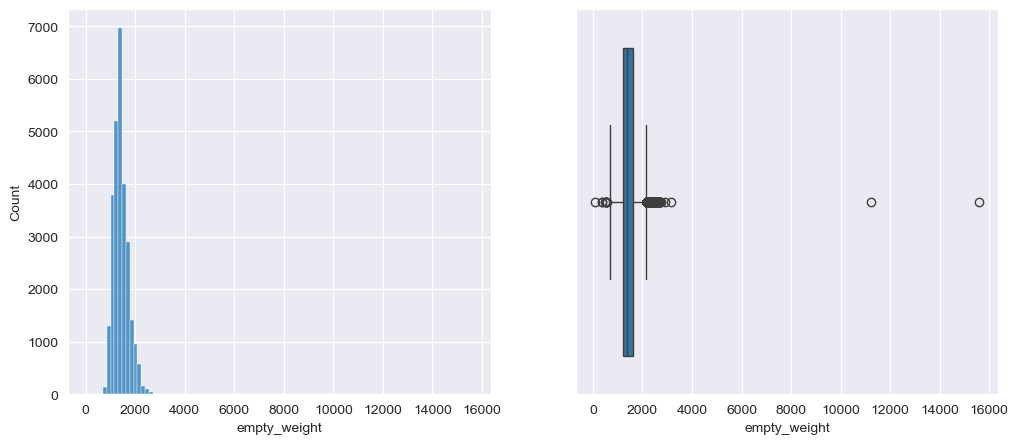

In [67]:
distribution_plot('empty_weight')

In [68]:
df.empty_weight.sort_values(ascending=False).head(20)

6869     15590.000000
21142    11246.000000
1295      3150.000000
20037     2900.000000
5414      2750.000000
17891     2725.000000
2371      2712.000000
1199      2690.000000
2199      2680.000000
1628      2680.000000
2156      2655.000000
17907     2650.000000
1381      2621.333333
1398      2621.333333
1449      2612.000000
1481      2610.000000
1333      2610.000000
1373      2595.000000
1270      2595.000000
22083     2585.000000
Name: empty_weight, dtype: float64

In [69]:
df.drop([6869, 21142], axis=0, inplace=True)

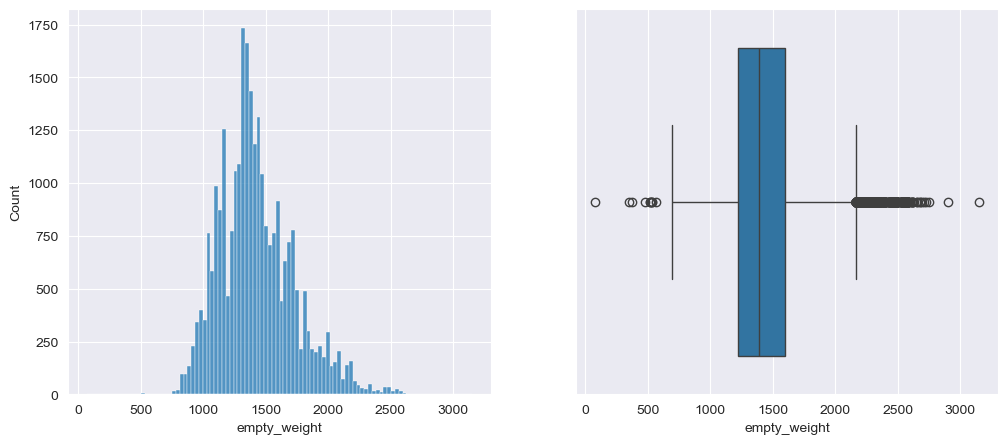

In [70]:
distribution_plot('empty_weight')

In [71]:
df.empty_weight.sort_values(ascending=True).head(20)

13995     75.000000
6166     347.000000
6205     375.000000
4886     473.000000
4838     517.500000
4943     517.500000
4188     525.000000
5919     532.666667
5748     532.666667
5140     562.000000
17178    695.000000
9651     710.000000
12148    719.000000
7279     765.000000
7372     775.000000
7422     775.000000
17047    775.000000
7450     775.000000
7469     775.000000
7458     780.000000
Name: empty_weight, dtype: float64

In [72]:
df.drop([13995, 6166, 6205], inplace=True)

In [73]:
df.shape

(27544, 34)

In [74]:
## Handle outliers in 'previous_owner' column

In [75]:
df.previous_owner.value_counts()

previous_owner
1.0     18908
2.0      7276
3.0       882
4.0       270
5.0        70
6.0        53
7.0        47
8.0        18
9.0        14
12.0        3
10.0        1
14.0        1
13.0        1
Name: count, dtype: int64

In [76]:
df[df.previous_owner >= 9].index

Index([ 3177,  6543,  7259,  7327,  7349,  7554,  7828,  9811, 10385, 19405,
       25751, 25861, 26067, 26176, 26391, 26495, 26566, 26670, 27820, 28200],
      dtype='int64')

In [77]:
df.drop(df[df.previous_owner >= 9].index, axis=0, inplace=True)

In [78]:
df.shape

(27524, 34)

In [79]:
## Handle outliers in horse_power

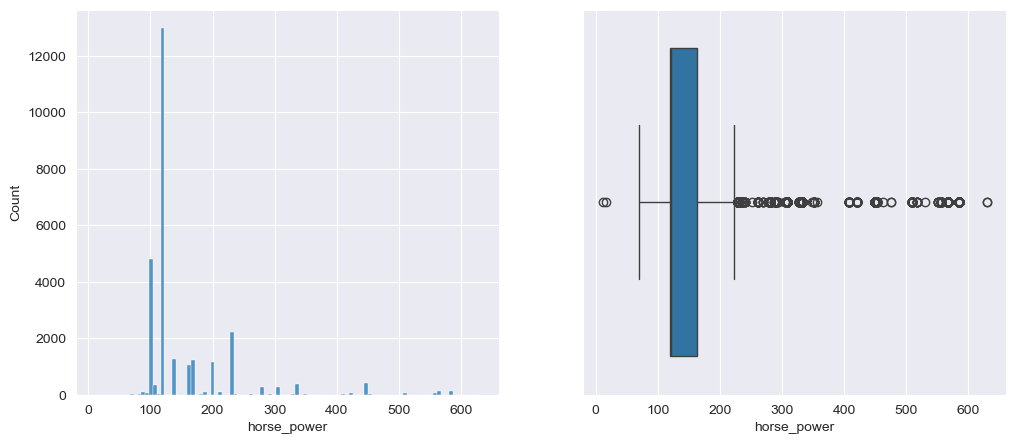

In [80]:
distribution_plot('horse_power')

In [81]:
df.drop(df[df.horse_power < 60].index, axis=0, inplace=True)

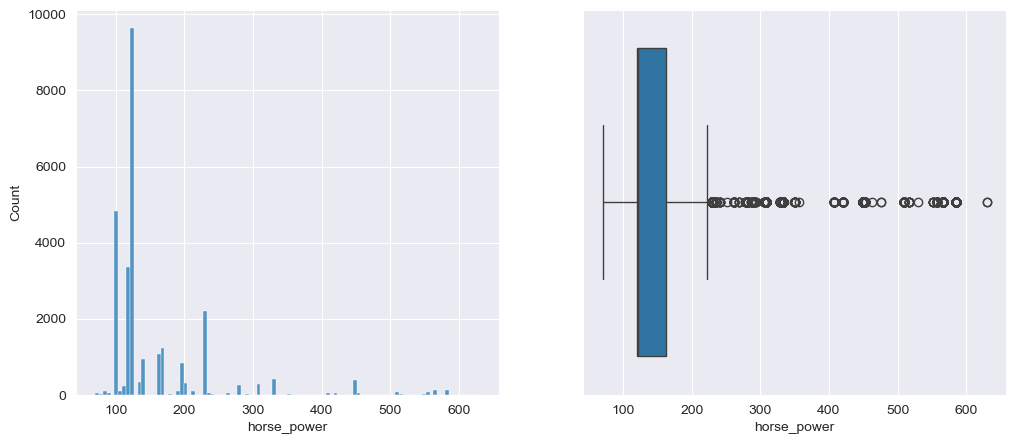

In [82]:
distribution_plot('horse_power')

In [83]:
df.horse_power.describe()

count    27522.000000
mean       154.489663
std         81.960298
min         70.000000
25%        120.000000
50%        122.000000
75%        163.000000
max        630.000000
Name: horse_power, dtype: float64

In [84]:
## Handle outliers in 'fuel_consumption' column

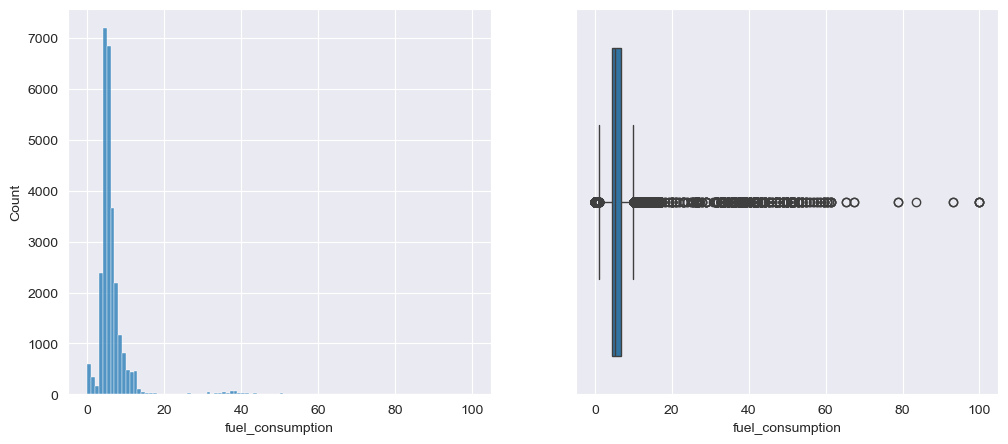

In [85]:
distribution_plot('fuel_consumption')

In [86]:
df.loc[df[(df.fuel_consumption == 0) & ~(df.fuel_type == 'Electric')].index, 'fuel_consumption'] = np.nan

In [87]:
df[df.fuel_consumption == 0].index

Index([20523], dtype='int64')

In [88]:
df.drop(20523, axis=0, inplace=True)

In [89]:
df[df.fuel_type == 'Electric'].fuel_consumption.value_counts()

fuel_consumption
4.142905     50
5.198135     34
4.716332     28
5.071535     21
6.318182     20
5.190451     17
4.598781     15
4.154847     14
7.504614     12
5.367614     12
11.171656    11
4.903279      9
4.727614      7
6.171328      6
6.133261      6
5.722735      6
5.538192      6
5.507931      5
4.467145      5
6.797143      5
4.766667      5
5.543899      4
5.913922      3
4.262440      3
4.896551      3
6.577506      3
9.624296      3
5.800209      2
6.056985      2
8.319100      2
5.080000      2
8.500000      2
4.800000      2
27.344587     1
6.573369      1
21.877779     1
5.115542      1
6.602460      1
20.059739     1
8.939496      1
33.600000     1
Name: count, dtype: int64

In [90]:
df[df.fuel_consumption > 25].shape

(572, 34)

In [91]:
df.loc[df[df.fuel_consumption > 25].index, 'fuel_consumption'] = np.nan

In [92]:
df.fuel_consumption.isnull().sum()

1155

In [93]:
df.fuel_consumption = df.fuel_consumption.fillna(df.groupby(['make_model'])['engine_size'].transform(lambda x: x.mean()))

In [94]:
df.fuel_consumption.isnull().sum()

0

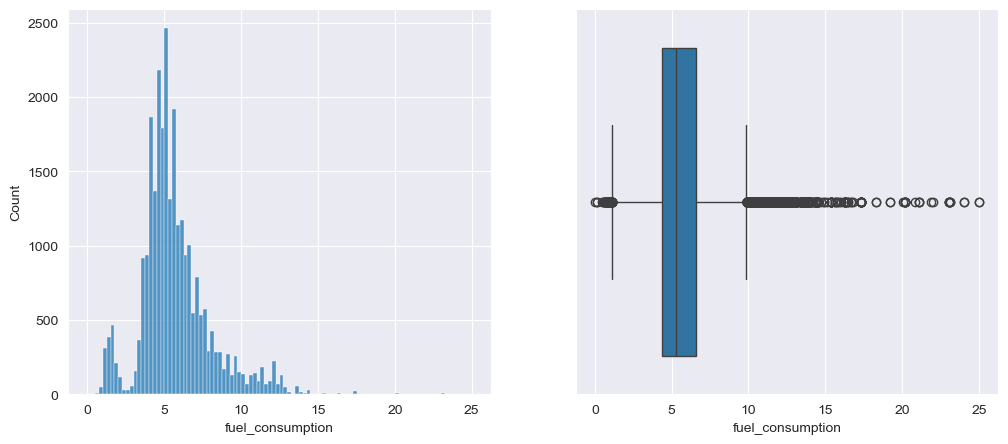

In [95]:
distribution_plot('fuel_consumption')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27521 entries, 0 to 28629
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            27521 non-null  object 
 1   make                  27521 non-null  object 
 2   model                 27521 non-null  object 
 3   price                 27521 non-null  float64
 4   body_type             27521 non-null  object 
 5   type                  27521 non-null  object 
 6   doors                 27521 non-null  float64
 7   origin_country        27521 non-null  object 
 8   warranty              27521 non-null  object 
 9   mileage               27521 non-null  float64
 10  first_registration    27521 non-null  float64
 11  gearbox               27521 non-null  object 
 12  fuel_type             27521 non-null  object 
 13  color                 27521 non-null  object 
 14  paint                 27521 non-null  object 
 15  seller                27

In [97]:
df.isnull().sum()

make_model              0
make                    0
model                   0
price                   0
body_type               0
type                    0
doors                   0
origin_country          0
warranty                0
mileage                 0
first_registration      0
gearbox                 0
fuel_type               0
color                   0
paint                   0
seller                  0
seats                   0
engine_size             0
gears                   0
drivetrain              0
cylinders               0
empty_weight            0
full_service_history    0
emission_class          0
upholstery_color        0
upholstery              0
previous_owner          0
horse_power             0
fuel_consumption        0
comfort_convenience     0
safety_security         0
entertainment           0
extras                  0
current_location        0
dtype: int64

In [98]:
df.sample()

,make_model,make,model,price,body_type,type,doors,origin_country,warranty,mileage,first_registration,gearbox,fuel_type,color,paint,seller,seats,engine_size,gears,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_color,upholstery,previous_owner,horse_power,fuel_consumption,comfort_convenience,safety_security,entertainment,extras,current_location
26734,Volvo XC60,Volvo,XC60,64900.0,Off-Road/Pick-up,Used,4.0,Germany,Yes,56500.0,2018.0,Automatic,Diesel,White,Uni/basic,Dealer,5.0,1.9,8.0,4WD,4.0,1990.848485,Yes,Euro 6,Black,Cloth,1.0,230.0,4.860606,Deluxe,Premium,Premium,Premium,DE


In [99]:
df.corr(numeric_only=True).price

price                 1.000000
doors                 0.018355
mileage              -0.399670
first_registration    0.384802
seats                 0.004237
engine_size           0.431894
gears                 0.256718
cylinders             0.404641
empty_weight          0.581740
previous_owner       -0.220142
horse_power           0.638947
fuel_consumption      0.248866
Name: price, dtype: float64

In [100]:
df.duplicated().sum()

4055

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.shape

(23466, 34)

In [103]:
df.columns

Index(['make_model', 'make', 'model', 'price', 'body_type', 'type', 'doors',
       'origin_country', 'warranty', 'mileage', 'first_registration',
       'gearbox', 'fuel_type', 'color', 'paint', 'seller', 'seats',
       'engine_size', 'gears', 'drivetrain', 'cylinders', 'empty_weight',
       'full_service_history', 'emission_class', 'upholstery_color',
       'upholstery', 'previous_owner', 'horse_power', 'fuel_consumption',
       'comfort_convenience', 'safety_security', 'entertainment', 'extras',
       'current_location'],
      dtype='object')

In [104]:
df.reset_index(inplace=True)

In [105]:
df.to_csv('auto_scout_part3.csv', index=False)